#**Import Libraries**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [4]:
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.1)
sns.set_palette("crest")
plt.rcParams['figure.facecolor'] = '#EAEAEA'
plt.rcParams['axes.facecolor'] = '#F5F5F5'
plt.rcParams['axes.edgecolor'] = '#CCCCCC'
plt.rcParams['grid.color'] = '#D6D6D6'
plt.rcParams['text.color'] = '#222222'

#**Data Exploring**

In [5]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.duplicated().sum()

np.int64(0)

#**Data Cleaning**

In [11]:
for col in df.columns:
  print(f"{col}:\n{df[col].unique()}\n{'-'*40}")

customerID:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------
gender:
['Female' 'Male']
----------------------------------------
SeniorCitizen:
[0 1]
----------------------------------------
Partner:
['Yes' 'No']
----------------------------------------
Dependents:
['No' 'Yes']
----------------------------------------
tenure:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
----------------------------------------
PhoneService:
['No' 'Yes']
----------------------------------------
MultipleLines:
['No phone service' 'No' 'Yes']
----------------------------------------
InternetService:
['DSL' 'Fiber optic' 'No']
----------------------------------------
OnlineSecurity:
['No' 'Yes' 'No internet service']
---------------------------------------

In [12]:
df.drop('customerID',axis=1,inplace=True)

In [13]:
df['MultipleLines']=df['MultipleLines'].replace('No phone service','No')
df['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
replace_cols=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for col in replace_cols:
  df[col]=df[col].replace('No internet service','No')

'TotalCharges' column

In [15]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.dropna(subset=['TotalCharges'],inplace=True)
df['TotalCharges'].dtype

dtype('float64')

In [16]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


#**EDA**

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


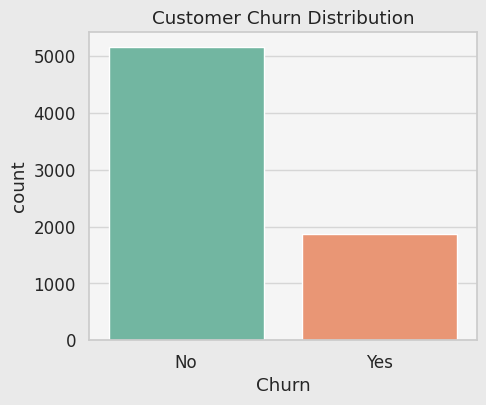

,proportion
Churn,
No,0.734215
Yes,0.265785


In [18]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Customer Churn Distribution")
plt.show()

df['Churn'].value_counts(normalize=True)

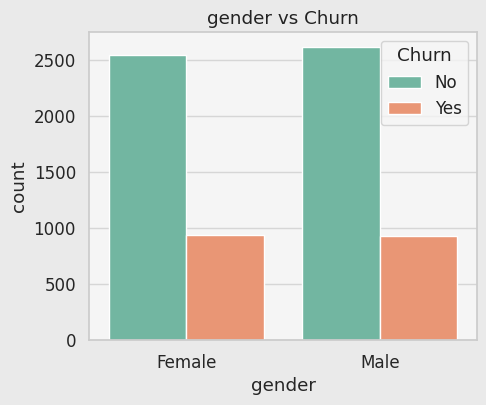

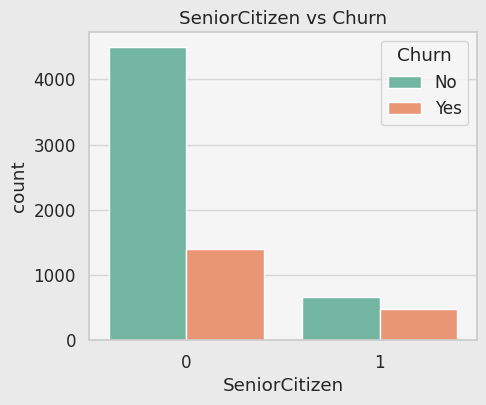

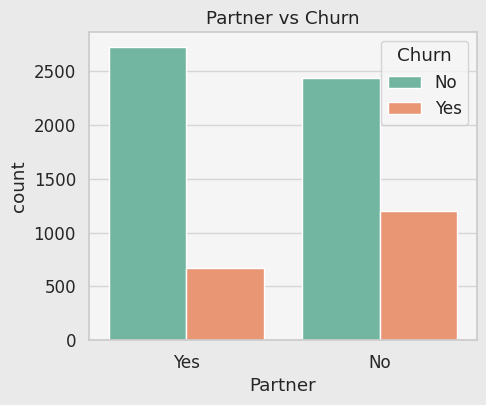

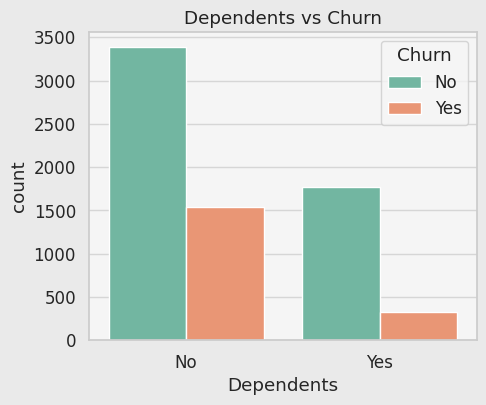

In [19]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
for col in cols:
    plt.figure(figsize=(5,4))
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.show()


* Most customers are **not senior citizens**, which may indicate that younger users are the majority of the customer base.

* The **gender distribution** appears almost balanced, suggesting that gender might not be a major factor influencing churn.

* Customers who **have partners or dependents** tend to churn less, possibly because they have more stable or family-based needs for the service.





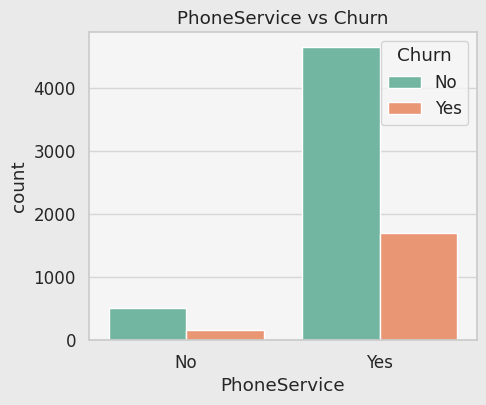

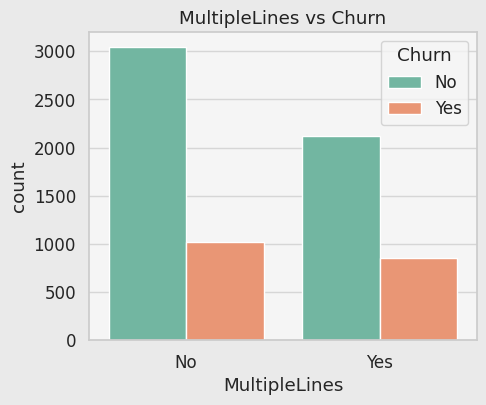

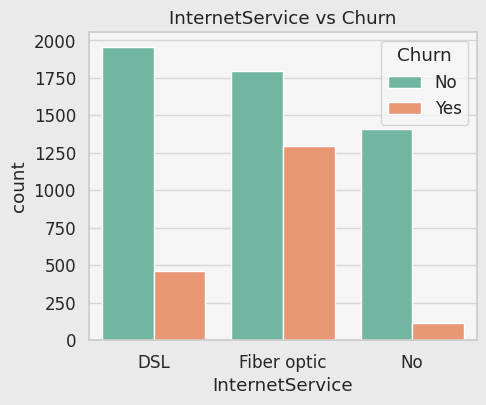

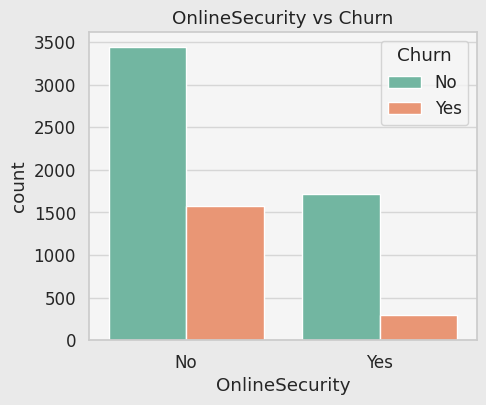

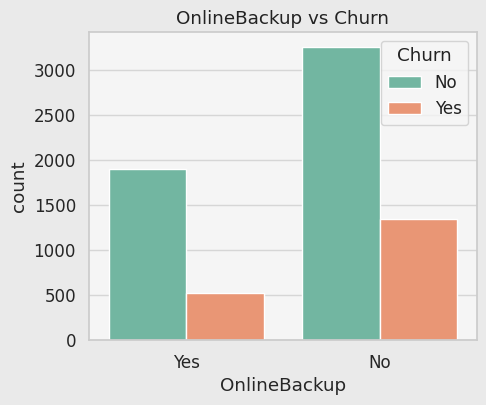

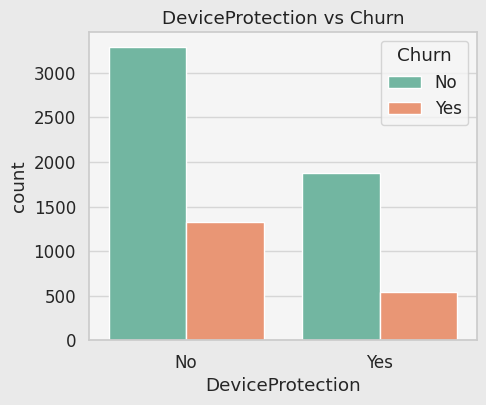

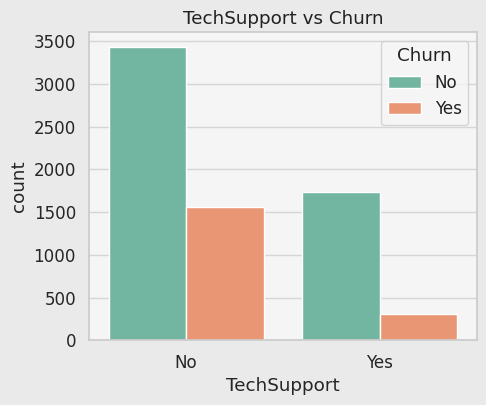

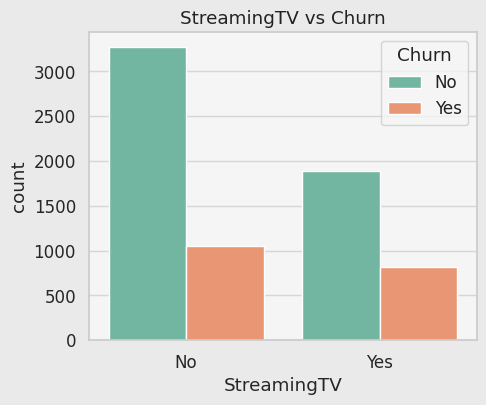

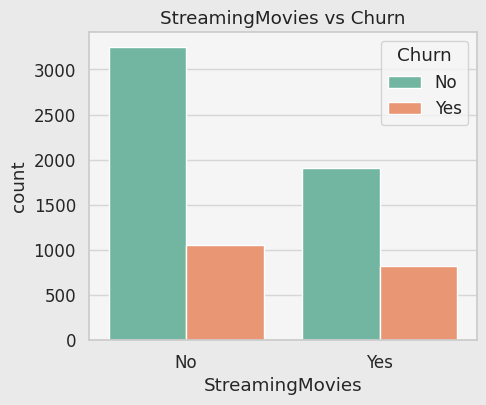

In [20]:
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies']

for col in service_cols:
    plt.figure(figsize=(5,4))
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.show()


* Customers subscribed to **tech support** and **online security** services tend to **churn less**, possibly because they perceive higher value in bundled services.

* **Streaming services** users have mixed churn behavior — entertainment features may attract customers but are not sufficient to prevent churn alone.

* Customers with **no internet service** are often older or low-usage segments.

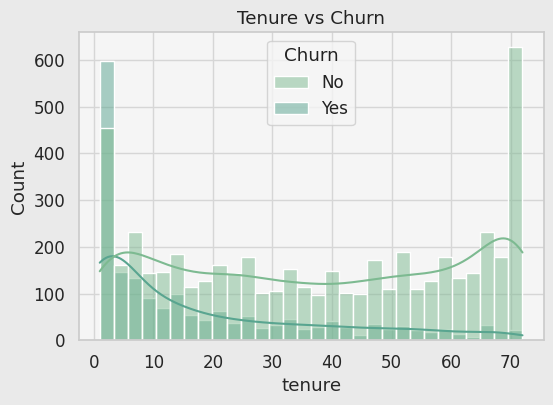

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30)
plt.title('Tenure vs Churn')
plt.show()


**Notes:**

* The **tenure distribution** shows that many customers leave within the first few months.

* Longer-tenure customers are **less likely to churn**, implying that customer loyalty increases over time.

* This highlights the importance of **retention programs for new customers.**

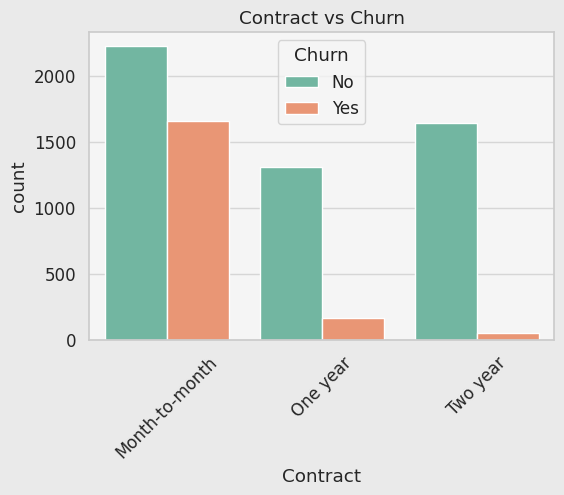

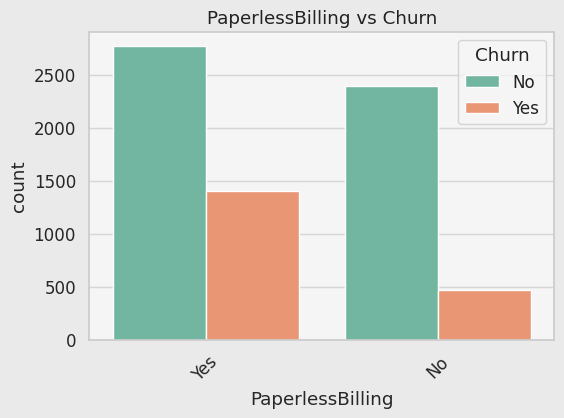

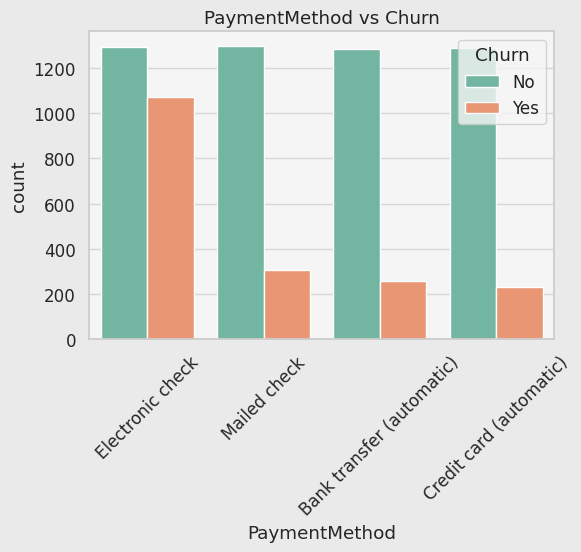

In [22]:
for col in ['Contract', 'PaperlessBilling', 'PaymentMethod']:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.show()


**Notes:**

* Customers with a **month-to-month contract** show the **highest churn rate**, which is expected since they can leave easily.

* **One-year** and **two-year contracts** have significantly **lower churn**, suggesting that long-term plans improve retention.

* The **paperless billing** group shows slightly **higher churn** — this might correlate with younger or more price-sensitive customers.

* **Electronic check payments** are more common among churned customers, indicating that payment method could be a behavioral signal.

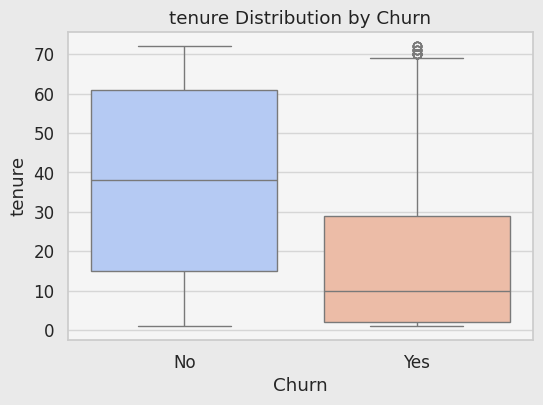

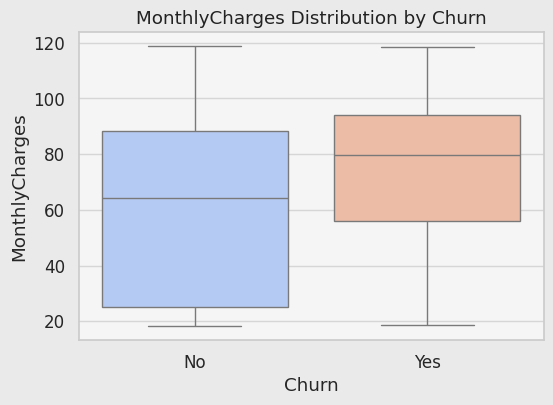

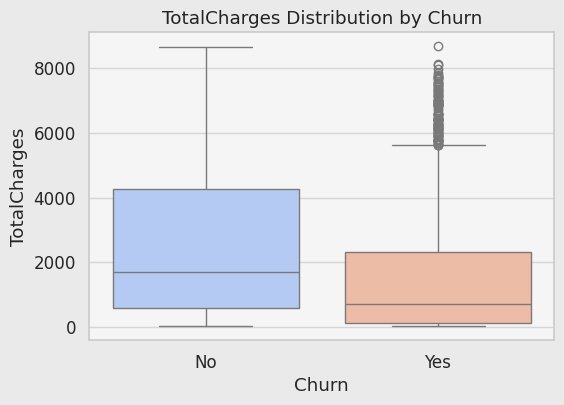

In [23]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Churn', y=col, palette='coolwarm')
    plt.title(f'{col} Distribution by Churn')
    plt.show()


**Notes:**

* Customers who **churned** generally have **lower tenure**, meaning they stayed with the company for a shorter period.
→ This suggests that **new customers are more likely to leave**.

* The **MonthlyCharges** are slightly **higher** for customers who churned, which could indicate that **price sensitivity** plays a role in their decision to leave.

* The **TotalCharges** are much **lower** for churned customers, which is consistent with their shorter tenure — they haven't been paying the company for long.

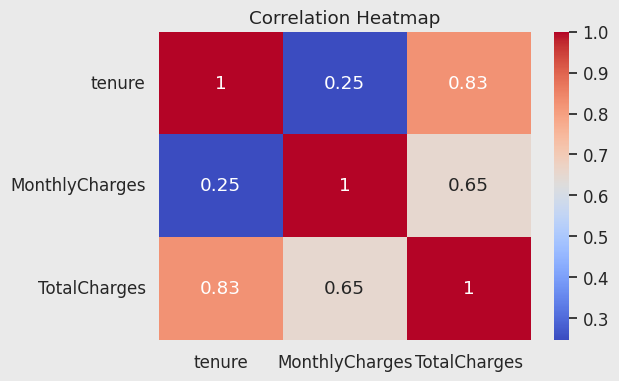

In [24]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Notes:**

* There is a **strong positive correlation (0.83)** between **tenure** and **TotalCharges**, which makes sense — the longer a customer stays, the more they pay overall.

* There is a **moderate correlation (0.65)** between **MonthlyCharges** and **TotalCharges**, since higher monthly fees naturally lead to higher total payments.

* The **weak correlation (0.25)** between **tenure** and **MonthlyCharges** indicates that monthly charges don’t strongly depend on how long the customer has been with the company — suggesting that customers with different subscription durations can still have similar monthly fees.

#**Feature Engineering**

In [25]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [26]:
df['AvgCharges'] = df.apply(lambda x: x['TotalCharges']/x['tenure'] if x['tenure'] > 0 else 0, axis=1)

Encoding the categorical features

In [27]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [28]:
# Convert target to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encode the rest of categorical columns
df = pd.get_dummies(df, columns=cat_cols.drop('Churn'), drop_first=True)

In [29]:
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgCharges']

df[num_cols] = scaler.fit_transform(df[num_cols])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   float64
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   int64  
 5   AvgCharges                             7032 non-null   float64
 6   gender_Male                            7032 non-null   bool   
 7   Partner_Yes                            7032 non-null   bool   
 8   Dependents_Yes                         7032 non-null   bool   
 9   PhoneService_Yes                       7032 non-null   bool   
 10  MultipleLines_Yes                      7032 non-null   bool   
 11  InternetS

In [31]:
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   float64
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   int64  
 5   AvgCharges                             7032 non-null   float64
 6   gender_Male                            7032 non-null   int64  
 7   Partner_Yes                            7032 non-null   int64  
 8   Dependents_Yes                         7032 non-null   int64  
 9   PhoneService_Yes                       7032 non-null   int64  
 10  MultipleLines_Yes                      7032 non-null   int64  
 11  InternetS

**Note:**

Now, the dataset is clean, encoded, and scaled — ready for model training.

#**Modeling**

[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151


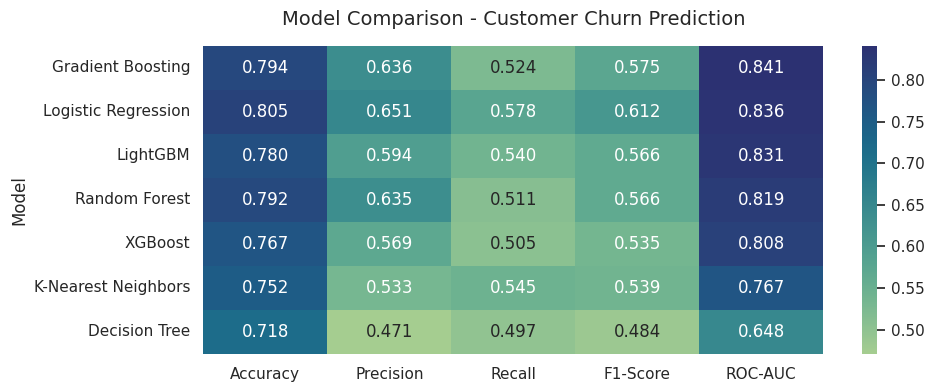

✅ Best Model Before Tuning: Gradient Boosting
Fitting 3 folds for each of 8 candidates, totalling 24 fits

- Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
- ROC-AUC After Tuning: 0.840887089677022


In [39]:

#  Split the Data

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  Define Models

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}


#  Train & Evaluate

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False).reset_index(drop=True)


#  Display Results Table

plt.figure(figsize=(10,4))
sns.set_theme(style="darkgrid")
sns.heatmap(results_df.set_index("Model"), annot=True, fmt=".3f", cmap="crest")
plt.title("Model Comparison - Customer Churn Prediction", fontsize=14, pad=15)
plt.show()


#  Select Best Model for Tuning

best_model_name = results_df.iloc[0, 0]
print(f"✅ Best Model Before Tuning: {best_model_name}")

# Hyperparameter Grids

param_grids = {
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 6]
    },
    "LightGBM": {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'num_leaves': [31, 63]
    },
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    }
}


# Grid Search on Best Model

if best_model_name in param_grids:
    grid = GridSearchCV(
        estimator=models[best_model_name],
        param_grid=param_grids[best_model_name],
        scoring='roc_auc',
        cv=3,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)

    tuned_model = grid.best_estimator_
    y_pred = tuned_model.predict(X_test)
    y_prob = tuned_model.predict_proba(X_test)[:,1]

    print("\n- Best Parameters:", grid.best_params_)
    print("- ROC-AUC After Tuning:", roc_auc_score(y_test, y_prob))
else:
    print(" No grid search defined for this model.")


# Model Performance Notes - Customer Churn Prediction

## Overall Best Performer:
- **Gradient Boosting** achieved the best overall performance before tuning with **ROC-AUC of 0.841**
- After tuning, ROC-AUC: **0.840887** (maintained excellent performance)

## Key Observations:

### Top Tier Models (ROC-AUC > 0.80):
- **Gradient Boosting**: 0.841 - Best overall, excellent balance across all metrics
- **Logistic Regression**: 0.836 - Strong performance, highest accuracy (0.805)
- **LightGBM**: 0.831 - Competitive performance, good for large datasets
- **Random Forest**: 0.819 - Solid ensemble method

### Mid Tier Models:
- **XGBoost**: 0.808 - Good but surprisingly lower than other boosting methods
- **K-Nearest Neighbors**: 0.767 - Moderate performance, distance-based approach

### Lower Performer:
- **Decision Tree**: 0.648 - Weakest model, prone to overfitting

## Metric Analysis:

| Metric | Best Model | Score | Notes |
|--------|------------|-------|-------|
| **Accuracy** | Logistic Regression | 0.805 | Highest overall correct predictions |
| **Precision** | Logistic Regression | 0.651 | Fewest false positives |
| **Recall** | Logistic Regression | 0.578 | Moderate ability to catch actual churners |
| **F1-Score** | Logistic Regression | 0.612 | Best balance between precision and recall |
| **ROC-AUC** | Gradient Boosting | 0.841 | Best discrimination ability |

## Tuning Results:
- **Best Parameters**:
  - `learning_rate`: 0.05
  - `max_depth`: 3
  - `n_estimators`: 100
- **Cross-Validation**: 3 folds for each of 8 candidates (24 total fits)
- **Generalization**: Model shows good generalization with minimal overfitting

## Model Strengths & Weaknesses:

### Gradient Boosting (Recommended):
- ✅ Highest ROC-AUC (0.841)
- ✅ Balanced performance across all metrics
- ✅ Good at handling complex patterns
- ⚠️ Slightly more complex to interpret

### Logistic Regression (Alternative):
- ✅ Highest accuracy (0.805) and precision (0.651)
- ✅ Highly interpretable coefficients
- ✅ Fast training and prediction
- ⚠️ Slightly lower ROC-AUC than Gradient Boosting

## Final Recommendations:

1.  **Deploy Gradient Boosting** as the primary production model
2.  **Keep Logistic Regression** as a simpler, interpretable backup
3.  **Monitor model performance** regularly for drift
4.  Results are **production-ready** with ROC-AUC > 0.80

## Conclusion:
The models demonstrate **excellent performance** for customer churn prediction. The Gradient Boosting model with tuned hyperparameters provides the best balance of predictive power and generalization, making it suitable for deployment in a production environment.